# Stage-2-Visualization

In [34]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats

%pylab inline
import matplotlib.image as mpimg

import os
import sys
import glob
import warnings

# Reload changed modules every time
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['hist', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
sys.path.insert(0, '/mnt/rds/redhen/gallina/home/hxm471/'\
                'RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/')
import constants as const

In [3]:
# Print out hxm471 home path
const.H_GAL_HOME_PATH

'/mnt/rds/redhen/gallina/home/hxm471/'

## Load in npy as array 

In [4]:
mmap_path = const.H_GAL_HOME_PATH+'splits/final_data.npy'

In [5]:
data = np.load(mmap_path,mmap_mode='r')
data

memmap([[0.08917022, 0.84544146, 0.44809267, ..., 0.        , 0.45554054,
         0.        ],
        [0.15810597, 1.2581841 , 0.3175806 , ..., 0.06767387, 0.45191595,
         0.        ],
        [0.02067209, 1.2264552 , 0.5643891 , ..., 0.        , 0.32206726,
         0.04237133],
        ...,
        [0.00581191, 0.45550644, 1.0652678 , ..., 0.14126919, 0.17970088,
         0.        ],
        [0.0159185 , 0.8542656 , 1.1215458 , ..., 0.1491844 , 0.22712366,
         0.02403476],
        [0.01115171, 0.44100156, 1.4400382 , ..., 0.20210318, 0.2517071 ,
         0.        ]], dtype=float32)

In [9]:
mmap_path_n2 = const.H_GAL_HOME_PATH+'splits/phase-2-2_outputs.npy'
mmap_path_n3 = const.H_GAL_HOME_PATH+'splits/phase-2-3_outputs.npy'
mmap_path_n4 = const.H_GAL_HOME_PATH+'splits/phase-2-4_outputs.npy'
mmap_path_n5 = const.H_GAL_HOME_PATH+'splits/phase-2-5_outputs.npy'

In [10]:
output_n2 = np.load(mmap_path_n2,mmap_mode='r')
output_n3 = np.load(mmap_path_n3,mmap_mode='r')
output_n4 = np.load(mmap_path_n4,mmap_mode='r')
output_n5 = np.load(mmap_path_n5,mmap_mode='r')

## Analyze Outputs 

In [36]:
def mean_median_mode_std(values):
    avg = np.average(values)
    median = np.median(values)
    std = np.std(values)
    mode = stats.mode(values)
    
    print("Number of clusters:",len(values))
    print("Average:",avg)
    print("Median:",median)
    print("Mode:",mode)
    print("Standard Deviation:",std)

### N Neighbors = 2 

In [11]:
output_n2

memmap([    0,     0,     0, ..., 20990,    -1, 20990], dtype=int32)

In [13]:
unique_n2, counts_n2 = np.unique(output_n2, return_counts=True)
label_counts_n2 = np.column_stack((unique_n2,counts_n2))

In [30]:
print("Number of input features:",len(output_n2))
print("Number of clusters:",len(label_counts_n2))

Number of input features: 145305
Number of clusters: 21001


In [22]:
sorted_label_counts_n2 = label_counts_n2[label_counts_n2[:,1].argsort()]
sorted_label_counts_n2[::-1][:10]

array([[   -1, 28649],
       [    2,  6563],
       [ 1120,   421],
       [ 4779,   348],
       [ 1663,   250],
       [ 2477,   199],
       [  770,   142],
       [ 1647,   141],
       [ 2406,   120],
       [ 5342,   119]])

In [37]:
mean_median_mode_std(label_counts_n2[:,1])

Number of clusters: 21001
Average: 6.918956240179039
Median: 4.0
Mode: ModeResult(mode=array([3]), count=array([8647]))
Standard Deviation: 202.87316381740104


In [33]:
n2_avg = np.average(label_counts_n2[:,1])
n2_median = np.median(label_counts_n2[:,1])
n2_std = np.std(label_counts_n2[:,1])
from scipy import stats
n2_mode = stats.mode(label_counts_n2[:,1])

print("Average:",n2_avg)
print("Median:",n2_median)
print("Mode:",n2_mode)
print("Standard Deviation:",n2_std)

Average: 6.918956240179039
Median: 4.0
Mode: ModeResult(mode=array([3]), count=array([8647]))
Standard Deviation: 202.87316381740104



[22432  1432  1433  1432  1434  1432  1433  1432  1433  1432  1433  1432
  1433  1432   946     0     0     0     0     1]
[-1.00000e+00  1.43150e+03  2.86400e+03  4.29650e+03  5.72900e+03
  7.16150e+03  8.59400e+03  1.00265e+04  1.14590e+04  1.28915e+04
  1.43240e+04  1.57565e+04  1.71890e+04  1.86215e+04  2.00540e+04
  2.14865e+04  2.29190e+04  2.43515e+04  2.57840e+04  2.72165e+04
  2.86490e+04]



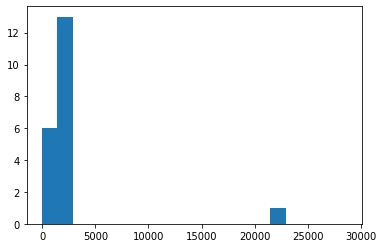

In [14]:
hist, bins = np.histogram(label_counts_n2,bins=20)
plt.hist(hist, bins)
# printing histogram
print()
print (hist)
print (bins)
print()

### N Neighbors = 3

In [38]:
unique_n3, counts_n3 = np.unique(output_n3, return_counts=True)
label_counts_n3 = np.column_stack((unique_n3,counts_n3))

In [39]:
mean_median_mode_std(label_counts_n3[:,1])

Number of clusters: 13479
Average: 10.780102381482306
Median: 5.0
Mode: ModeResult(mode=array([5]), count=array([4738]))
Standard Deviation: 307.90113534916253


### N Neighbors = 4 

In [40]:
unique_n4, counts_n4 = np.unique(output_n4, return_counts=True)
label_counts_n4 = np.column_stack((unique_n4,counts_n4))

In [41]:
mean_median_mode_std(label_counts_n4[:,1])

Number of clusters: 8720
Average: 16.66341743119266
Median: 5.0
Mode: ModeResult(mode=array([5]), count=array([4500]))
Standard Deviation: 606.3514501449703


### N Neighbors = 5

In [42]:
unique_n5, counts_n5 = np.unique(output_n5, return_counts=True)
label_counts_n5 = np.column_stack((unique_n5,counts_n5))

In [43]:
mean_median_mode_std(label_counts_n5[:,1])

Number of clusters: 3939
Average: 36.88880426504189
Median: 9.0
Mode: ModeResult(mode=array([6]), count=array([755]))
Standard Deviation: 1333.1194053402387
